In [203]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
 

In [204]:
import tensorflow as tf

In [205]:
print(tf.__version__)

2.9.1


In [206]:
from tensorflow.keras.preprocessing import image

In [207]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [208]:
import os

In [209]:
# Function for plotting model loss
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']

    # Set figure size
    plt.figure(figsize=(12, 8))

    # Generate line plot of training, testing loss over epochs
    plt.plot(train_loss, label='Training Loss', color='#185fad')
    plt.plot(test_loss, label='Testing Loss', color='orange')

    # Set title
    plt.title('Training and Testing Loss by Epoch', fontsize = 25)
    plt.xlabel('Epoch', fontsize = 18)
    plt.ylabel('Categorical Crossentropy', fontsize = 18)
    plt.xticks(np.arange(10), np.arange(10))

    plt.legend(fontsize = 18);

In [210]:
data_path = './training'
data_dir = os.listdir(data_path)

In [211]:
data_dir # this is the data folder

['vegetarian', '.DS_Store', 'places', 'non_vegetarian']

In [212]:
data_dir.remove('.DS_Store')

In [213]:
vegetarian_images = os.listdir(data_path+'/vegetarian')
len(vegetarian_images)

488

In [214]:
non_vegetarian_images = os.listdir(data_path+'/non_vegetarian')
len(non_vegetarian_images)

1265

In [215]:
places_images = os.listdir(data_path+'/places')

In [216]:
len(places_images)

1474

In [217]:
img_data_list = []
labels = []

for data in data_dir:
    img_list = os.listdir(data_path+'/'+data)
    print('Loading images of', data)
    for img in img_list:
        img_path = data_path +'/'+ data + '/' + img
        try:
            img = image.load_img(img_path, target_size= (50,50))
            
            x = image.img_to_array(img)
            x = preprocess_input(x)
            img_data_list.append(x)
            labels.append(data)
        except:
            continue

Loading images of vegetarian
Loading images of places
Loading images of non_vegetarian


In [335]:
img_data_list

[array([[[0.45490196, 0.4392157 , 0.39215687],
         [0.48235294, 0.45490196, 0.42352942],
         [0.65882355, 0.6745098 , 0.6784314 ],
         ...,
         [0.4117647 , 0.3254902 , 0.18039216],
         [0.34117648, 0.2509804 , 0.12941177],
         [0.29411766, 0.20392157, 0.07843138]],
 
        [[0.4862745 , 0.4627451 , 0.40784314],
         [0.49411765, 0.4745098 , 0.4509804 ],
         [0.627451  , 0.65882355, 0.6666667 ],
         ...,
         [0.40784314, 0.31764707, 0.15294118],
         [0.36078432, 0.26666668, 0.13333334],
         [0.4       , 0.30588236, 0.15686275]],
 
        [[0.48235294, 0.45882353, 0.4117647 ],
         [0.6313726 , 0.6509804 , 0.6666667 ],
         [0.6156863 , 0.6313726 , 0.6431373 ],
         ...,
         [0.30980393, 0.21176471, 0.09019608],
         [0.38039216, 0.28627452, 0.15294118],
         [0.35686275, 0.2627451 , 0.12156863]],
 
        ...,
 
        [[0.40392157, 0.3372549 , 0.30980393],
         [0.40392157, 0.32941177, 0.30588

In [234]:
len(img_data_list)

3223

In [235]:
len(labels)

3223

In [236]:
img_data = np.array(img_data_list)

In [237]:
img_data.shape

(3223, 50, 50, 3)

In [238]:
np.save('train_sq_data.npy', img_data)

In [239]:
np.save('train_sq_labels.npy', labels)

In [240]:
img_data = np.load('train_sq_data.npy')
labels = np.load('train_sq_labels.npy')

In [241]:
len(img_data)

3223

In [242]:
len(labels)

3223

In [243]:
labels

array(['vegetarian', 'vegetarian', 'vegetarian', ..., 'non_vegetarian',
       'non_vegetarian', 'non_vegetarian'], dtype='<U14')

In [244]:
num_class = 3
num_of_samples = img_data.shape[0]

In [245]:
num_of_samples

3223

In [246]:
from tensorflow.keras.utils import to_categorical

In [247]:
names = ['vegetarian', 'places', 'non_vegetarian']

In [248]:
from tensorflow.keras import utils

In [249]:
numerical_labels = []

In [250]:
for each in labels:
    if each == 'vegetarian':
        numerical_labels.append(0)
    elif each == 'non_vegetarian':
        numerical_labels.append(1)
    else:
        numerical_labels.append(2)

In [337]:
import pandas as pd

In [339]:
pd.Series(labels).value_counts(normalize=True)

vegetarian        0.493590
non_vegetarian    0.301282
places            0.205128
dtype: float64

In [ ]:
a

In [251]:
numerical_labels= np.array(numerical_labels)

In [252]:
numerical_labels[:2]

array([0, 0])

In [253]:
labels

array(['vegetarian', 'vegetarian', 'vegetarian', ..., 'non_vegetarian',
       'non_vegetarian', 'non_vegetarian'], dtype='<U14')

In [254]:
x = img_data

In [255]:
y = utils.to_categorical(numerical_labels, num_classes=3)

In [256]:
y[:2]

array([[1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Train Test Split:

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [259]:
X_train.shape

(2578, 50, 50, 3)

In [260]:
X_test.shape

(645, 50, 50, 3)

# Modeling :

In [261]:
model = Sequential()

In [262]:
from keras.layers import Input, Flatten, Dense

In [263]:
from keras.models import Model

In [264]:
from tensorflow.keras.optimizers import Adam

In [265]:
# Instantiate a CNN
cnn_model = Sequential() # we are still using the same Sequentianl api to build the network

In [266]:
# Add a convolutional layer
cnn_model.add(Conv2D(filters=6,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=(50,50,3))) # kernel_size is the size of the filter, 3x3 is the most common size of filter used
                                        # 'relu' well help us not to get any negative values
                                       # input_shape(28,28,1) 1 indecating that our image is going to be dealing with a grayscale image
                                      #_for colored images we use 3 instead to indecate rgb colors

In [267]:
# Add Pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [268]:
# Add another convolutional layer
cnn_model.add(Conv2D(filters=16,
                     kernel_size=(3,3),
                     activation='relu'))
# Add another pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [269]:
# Flatten before fully connected layer
cnn_model.add(Flatten())

In [270]:
# Add a densely-connected layer with 128 neurons
cnn_model.add(Dense(128, activation='relu'))
# Add a final layer with 3 neurons
cnn_model.add(Dense(3, activation='softmax'))

In [271]:
# Compile model
cnn_model.compile(loss = 'categorical_crossentropy',
                 optimizer= 'adam',
                 metrics=['accuracy'])

In [272]:
# Fit model on training data
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10,
    verbose=1
)

Epoch 1/10
81/81 [==============================] - 2s 16ms/step - loss: 19.7997 - accuracy: 0.4969 - val_loss: 1.6596 - val_accuracy: 0.5612
Epoch 2/10
81/81 [==============================] - 1s 14ms/step - loss: 1.1955 - accuracy: 0.6303 - val_loss: 1.1687 - val_accuracy: 0.6264
Epoch 3/10
81/81 [==============================] - 1s 15ms/step - loss: 0.8292 - accuracy: 0.7025 - val_loss: 1.2230 - val_accuracy: 0.6791
Epoch 4/10
81/81 [==============================] - 1s 15ms/step - loss: 0.6413 - accuracy: 0.7653 - val_loss: 0.9736 - val_accuracy: 0.6589
Epoch 5/10
81/81 [==============================] - 1s 17ms/step - loss: 0.5191 - accuracy: 0.8045 - val_loss: 0.9659 - val_accuracy: 0.6636
Epoch 6/10
81/81 [==============================] - 1s 18ms/step - loss: 0.4153 - accuracy: 0.8355 - val_loss: 0.9902 - val_accuracy: 0.6775
Epoch 7/10
81/81 [==============================] - 1s 18ms/step - loss: 0.3113 - accuracy: 0.8871 - val_loss: 0.9633 - val_accuracy: 0.6667
Epoch 8/10
8

In [273]:
# Check out the model summary
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 6)         168       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 16)        880       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 11, 11, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1936)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

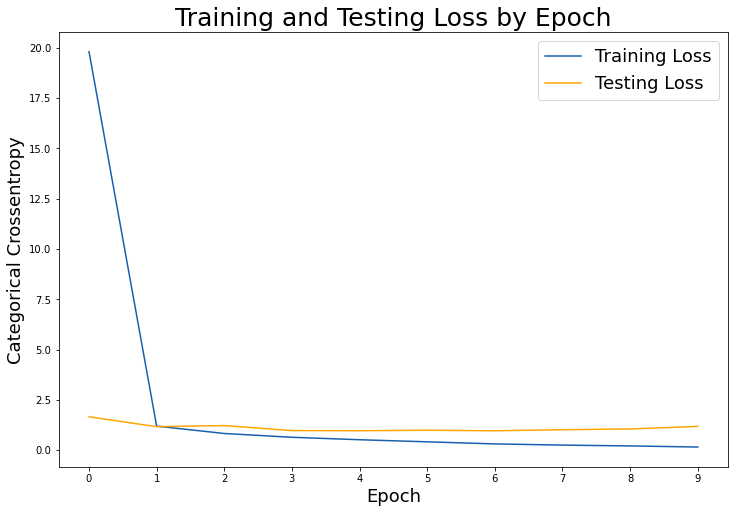

In [274]:
# Check out our train loss and test loss over epochs
plot_loss(history)

In [275]:
# Evaluate model on test data
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn_model.metrics_names

# Compare CNN and FFNN models.
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
# print()
# print(f'FFNN {labels[0]} : {score[0]}')
# print(f'FFNN {labels[1]}  : {score[1]}')

21/21 [==============================] - 0s 5ms/step - loss: 1.1819 - accuracy: 0.6806
CNN loss  : 1.1819015741348267
CNN accuracy   : 0.6806201338768005


In [276]:
# More Complexity!
# Instantiate a CNN
cnn_model_2 = Sequential()

# Add a convolutional layer
cnn_model_2.add(Conv2D(filters=16,             # number of filters
                       kernel_size=(3,3),      # height/width of filter
                       activation='relu',      # activation function 
                       input_shape=(50,50,3))) # shape of input (image)

# Add a pooling layer
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer
cnn_model_2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model_2.add(Flatten())

# Add a densely-connected layer with 64 neurons
cnn_model_2.add(Dense(64, activation='relu'))

# Add a densely-connected layer with 32 neurons
cnn_model_2.add(Dense(32, activation='relu'))

# Add a final layer with 3 neurons
cnn_model_2.add(Dense(3, activation='softmax'))

# Compile model
cnn_model_2.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model_2.fit(X_train,
                          y_train,
                          batch_size=128,
                          validation_data=(X_test, y_test),
                          epochs=10,
                          verbose=1)

Epoch 1/10
21/21 [==============================] - 3s 93ms/step - loss: 13.6393 - accuracy: 0.4791 - val_loss: 1.4461 - val_accuracy: 0.5550
Epoch 2/10
21/21 [==============================] - 2s 84ms/step - loss: 1.1026 - accuracy: 0.6202 - val_loss: 0.8568 - val_accuracy: 0.6481
Epoch 3/10
21/21 [==============================] - 2s 93ms/step - loss: 0.7325 - accuracy: 0.7033 - val_loss: 0.7978 - val_accuracy: 0.6729
Epoch 4/10
21/21 [==============================] - 2s 92ms/step - loss: 0.6085 - accuracy: 0.7510 - val_loss: 0.7261 - val_accuracy: 0.6884
Epoch 5/10
21/21 [==============================] - 2s 95ms/step - loss: 0.5191 - accuracy: 0.7998 - val_loss: 0.7140 - val_accuracy: 0.7163
Epoch 6/10
21/21 [==============================] - 2s 99ms/step - loss: 0.4269 - accuracy: 0.8344 - val_loss: 0.7003 - val_accuracy: 0.7101
Epoch 7/10
21/21 [==============================] - 2s 100ms/step - loss: 0.3763 - accuracy: 0.8588 - val_loss: 0.7986 - val_accuracy: 0.7070
Epoch 8/10


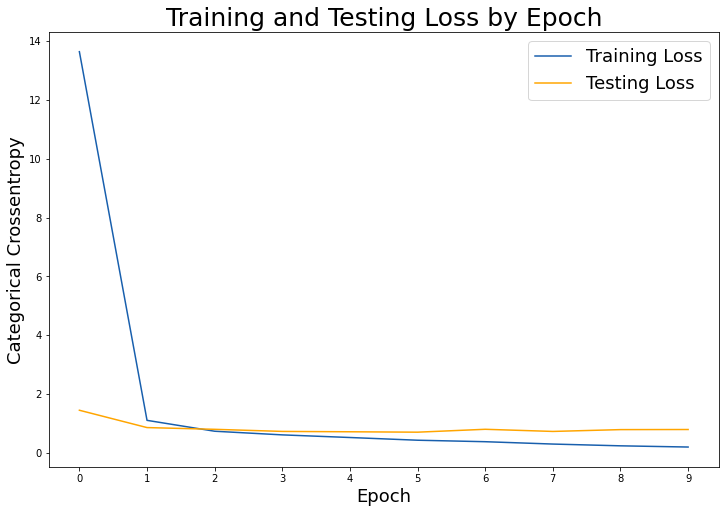

In [277]:
# Check out our train loss and test loss over epochs.
plot_loss(history)

In [278]:
# Evaluate model on test data.
cnn_2_score = cnn_model_2.evaluate(X_test,
                                   y_test,
                                   verbose=1)

cnn_2_labels = cnn_model_2.metrics_names

# Compare models.
print(f'CNN 2 {cnn_2_labels[0]}  : {cnn_2_score[0]}')
print(f'CNN 2 {cnn_2_labels[1]}   : {cnn_2_score[1]}')
print()
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')

21/21 [==============================] - 0s 7ms/step - loss: 0.7911 - accuracy: 0.7178
CNN 2 loss  : 0.791114330291748
CNN 2 accuracy   : 0.7178294658660889

CNN 1 loss  : 1.1819015741348267
CNN 1 accuracy   : 0.6806201338768005


In [279]:
cnn_model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 64)        9280      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 7744)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

# Predicting Test Data:

In [280]:
data_path = './testing'
data_dir = os.listdir(data_path)

In [281]:
data_dir.remove('.DS_Store')

In [282]:
data_dir

['vegetarian', 'places', 'non_vegetarian']

In [305]:
img_data_list = []
labels = []
image_paths = []

for data in data_dir:
    img_list = os.listdir(data_path+'/'+data)
    print('Loading images of', data)
    for img in img_list:
        img_path = data_path+'/'+data + '/' +img
        try:
            img = image.load_img(img_path, target_size= (50,50))
            x = image.img_to_array(img)/255
            img_data_list.append(x)
            labels.append(data)
            image_paths.append(img_path)
        except:
            continue

Loading images of vegetarian
Loading images of places
Loading images of non_vegetarian


In [306]:
img_data = np.array(img_data_list)

In [307]:
img_data.shape

(156, 50, 50, 3)

In [308]:
np.save('testing_sq_data.npy', img_data)

In [309]:
np.save('testing_sq_labels.npy', labels)

In [310]:
img_data = np.load('testing_sq_data.npy')
labels = np.load('testing_sq_labels.npy')

In [311]:
num_class = 3
num_of_samples = img_data.shape[0]

In [312]:
from tensorflow.keras.utils import to_categorical

In [313]:
from tensorflow.keras import utils

In [314]:
num_labels = []

In [315]:
for each in labels:
    if each == 'vegetarian':
        num_labels.append(0)
    elif each == 'non_vegetarian':
        num_labels.append(1)
    else:
        num_labels.append(2)

In [316]:
num_labels= np.array(num_labels)

In [317]:
num_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [318]:
x = img_data

In [319]:
y = utils.to_categorical(num_labels, num_classes=3)

In [320]:
# Get predictions
preds = cnn_model_2.predict(x)

5/5 [==============================] - 0s 6ms/step


In [321]:
# Check them out
print(preds.shape)
preds[0]

(156, 3)


array([0.32789785, 0.32985184, 0.34225032], dtype=float32)

In [322]:
# Get predicted classes # getting the actual predicted classes out of our propabilities
pred_classes = np.argmax(preds, axis=1)
pred_classes.shape, pred_classes[:10]

((156,), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

### On Single Image

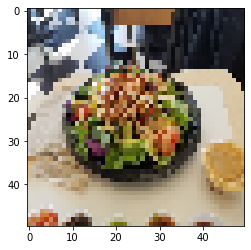

In [323]:
# Take a look at an example image.
# What's the array shape?
test_image = x[23]
plt.imshow((test_image));

In [324]:
test_img = np.expand_dims(test_image, axis=0)
test_img.shape


single_pred = cnn_model_2.predict(test_img)

single_pred = single_pred[0]
single_pred

np.argmax(single_pred)

1/1 [==============================] - 0s 16ms/step


2

# Predicting on test Data:

In [325]:
# Evaluate model on test data.
cnn_2_score = cnn_model_2.evaluate(x,y,verbose=1)


5/5 [==============================] - 0s 7ms/step - loss: 1.1074 - accuracy: 0.2051


In [326]:
cnn_2_labels= cnn_model_2.metrics_names

In [327]:
print(f'CNN 2 {cnn_2_labels[0]}  : {cnn_2_score[0]}')
print(f'CNN 2 {cnn_2_labels[1]}   : {cnn_2_score[1]}')

CNN 2 loss  : 1.1073743104934692
CNN 2 accuracy   : 0.20512820780277252


In [328]:
cnn_2_labels

['loss', 'accuracy']

In [329]:
non_vegetarian_images = []

In [330]:
places_images = []

In [331]:
vegetarian_images = []

In [332]:
for i, im in enumerate(x):
    test_img = np.expand_dims(im, axis=0)
    single_pred = cnn_model_2.predict(test_img)
    if np.argmax(single_pred) == 0:
        vegetarian_images.append(image_paths[i])
    elif np.argmax(single_pred)==1:
        non_vegetarian_images.append(image_paths[i])
    else:
        places_images.append(image_paths[i])
        

1/1 [==============================] - 0s 12ms/step


In [333]:
vegetarian_images

[]

In [334]:
vegetarian_images[2].split('/')[9]

IndexError: list index out of range